# **Step 2**

# **Load Dataset**

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# View first few raws
df.head()

# Dataset info
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Handle Missing Values**

In [2]:
# Check missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
# Fill 'Age' missing values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill 'Embarked' missing values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# **Create Meaningful Visualizations**

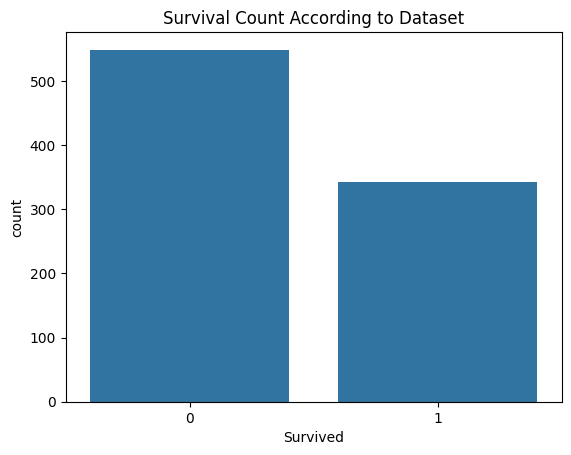

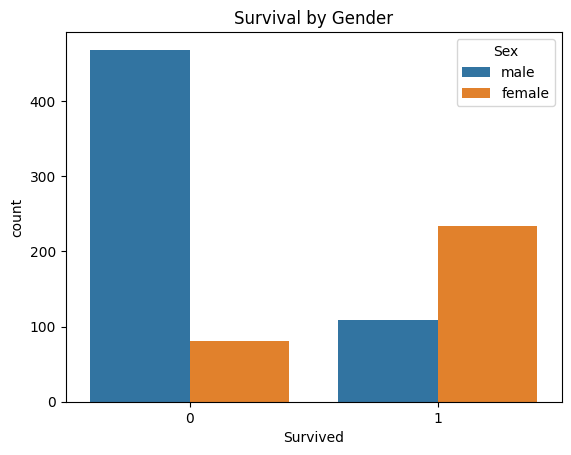

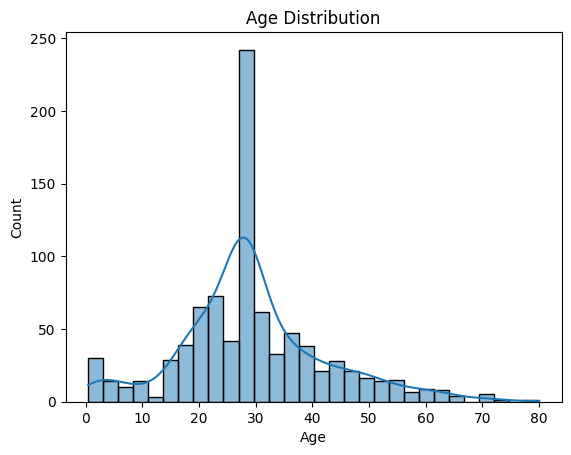

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Survived
sns.countplot(x='Survived', data=df)
plt.title('Survival Count According to Dataset')
plt.show()

# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# **Feature Engineering**

In [7]:
# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# **Split Data into Training and Testing Sets**

In [11]:
from sklearn.model_selection import train_test_split

# Features & target
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (712, 9)
Testing shape: (179, 9)


# **Step 3**

# **Import Required Libraries**

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# **Train Multiple Models**

In [13]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rand_forest = RandomForestClassifier(random_state=42)
svm_model = SVC()

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rand_forest,
    "SVM": svm_model
}

# Train and evaluate with cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} - Accuracy: {cv_scores.mean():.4f}")

Logistic Regression - Accuracy: 0.7907
Random Forest - Accuracy: 0.8104
SVM - Accuracy: 0.6461


# **Compare on Test Data**

In [14]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Error Matrix:\n", confusion_matrix(y_test, y_pred))

# Best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")


Logistic Regression Accuracy: 0.8045
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Error Matrix:
 [[89 16]
 [19 55]]

Random Forest Accuracy: 0.8380
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Error Matrix:
 [[94 11]
 [18 56]]

SVM Accuracy: 0.5978
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
     

# **Save the Train Model**

In [15]:
# Save using pickle
with open(f"{best_model_name.replace(' ', '_')}_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print(f"Model saved as {best_model_name.replace(' ', '_')}_model.pkl")

Model saved as Random_Forest_model.pkl


In [10]:
%pip install streamlit
!streamlit run app.py

Note: you may need to restart the kernel to use updated packages.


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
